In [46]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [47]:
X,y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

In [48]:
X.shape

(70000, 784)

In [49]:
y.shape

(70000,)

In [50]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")


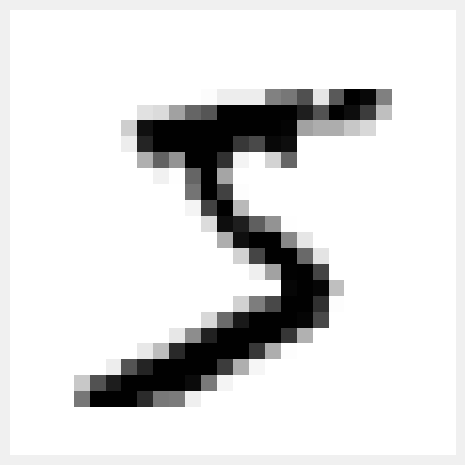

In [51]:
some_digit =X[0]
plot_digit(some_digit)
plt.show()

In [52]:
X_train, x_test, y_train, y_test, =X[:60000],X[:60000],y[:60000],y[:60000]

In [53]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [54]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [55]:
some_digit1 = X[10]

In [56]:
sgd_clf.predict([some_digit1])

array([False])

In [57]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy", n_jobs=-1)

array([0.95035, 0.96035, 0.9604 ])

In [58]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train,y_train_5)

print(any(dummy_clf.predict(X_train)))

False


In [59]:
cross_val_score(dummy_clf, X_train,y_train_5, cv=3,scoring="accuracy",n_jobs=-1)

array([0.90965, 0.90965, 0.90965])

In [60]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, n_jobs=-1)

In [61]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)

In [62]:
y_train_perfect_predictions = y_train_5

confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [63]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5,y_train_pred)
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [64]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [65]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [66]:
treshold = 0
y_some_digit_predict = (y_scores > treshold)
y_some_digit_predict

array([ True])

In [67]:
treshold = 2000
y_some_digit_pred = (y_scores > treshold)
y_some_digit_pred

array([ True])

In [68]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5,
                              cv=3,method="decision_function", n_jobs=-1)

In [69]:
from sklearn.metrics import precision_recall_curve

precisions, recall, tresholds = precision_recall_curve(y_train_5,y_scores)

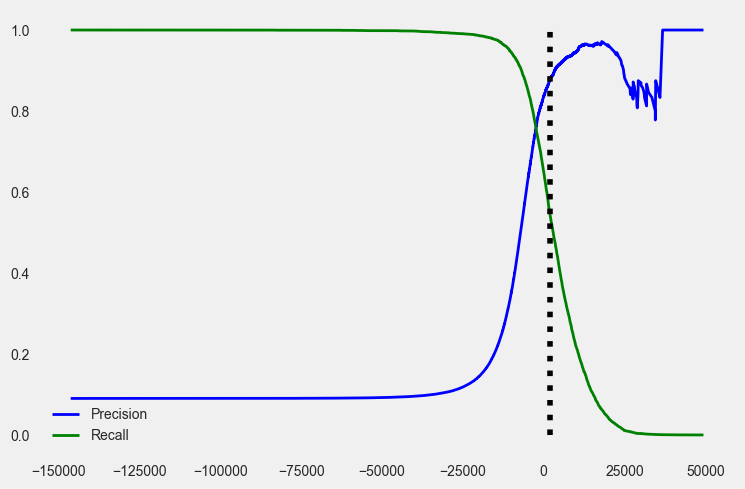

In [70]:
plt.plot(tresholds, precisions[:-1], "b-", label="Precision",linewidth=2)
plt.plot(tresholds, recall[:-1], "g-", label="Recall", linewidth="-2")
plt.grid()
plt.legend()
plt.vlines(treshold, 0,1.0,"k", "dotted", label="treshold")

plt.show()

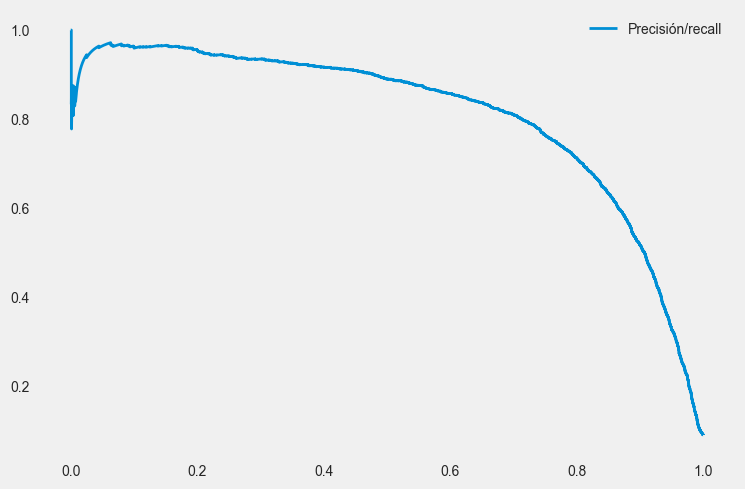

In [71]:
plt.plot(recall,precisions, linewidth=2, label="Precisión/recall")
plt.grid()
plt.legend()

In [72]:
idx_for_90_precision = (precisions >=0.90).argmax()
treshold_for_90_precision = tresholds[idx_for_90_precision]
treshold_for_90_precision

np.float64(3370.0194991439557)

In [73]:
y_train_pred_90 = (y_scores >= treshold_for_90_precision)

In [74]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [75]:
recall_at_precision_90 = recall_score(y_train_5, y_train_pred_90)
recall_at_precision_90

0.4799852425751706

In [76]:
from sklearn.metrics import roc_curve

fpr, tpr, tresholds = roc_curve(y_train_5, y_scores)

In [77]:
idx_for_treshold_at_90 = (tresholds <= treshold_for_90_precision).argmax()

In [78]:
tpr_90, fpr_90 = tpr[idx_for_treshold_at_90], fpr[idx_for_treshold_at_90]

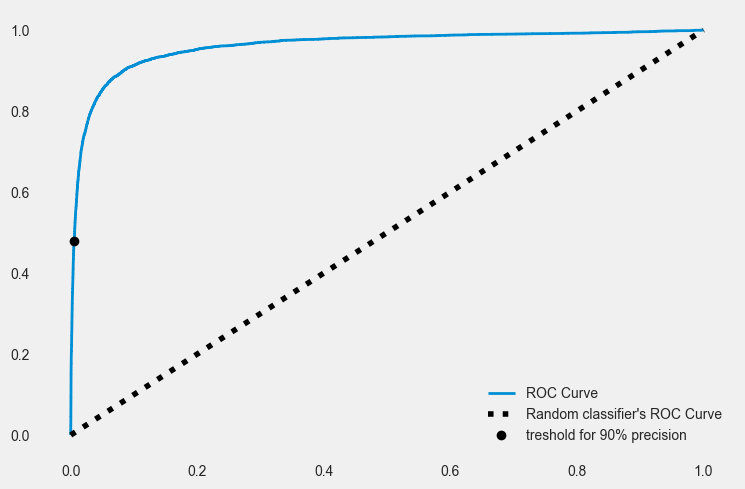

In [79]:
plt.plot(fpr,tpr, linewidth=2, label="ROC Curve")
plt.plot([0,1],[0,1],"k:", label="Random classifier's ROC Curve")
plt.plot([fpr_90], [tpr_90],"ko", label="treshold for 90% precision")
plt.grid()
plt.legend()

In [80]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

np.float64(0.9604938554008616)

In [81]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)


In [82]:
y_proba_fortes = cross_val_predict(forest_clf, X_train, y_train_5, cv=3
                                   ,method="predict_proba",n_jobs=-1)

In [83]:
y_proba_fortes[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [84]:
y_proba_fortes

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]], shape=(60000, 2))

In [85]:
y_score_forest = y_proba_fortes[:,1]
precision_forest, recall_forest, tresholds_forest = precision_recall_curve(y_train_5,
                                                                            y_score_forest)


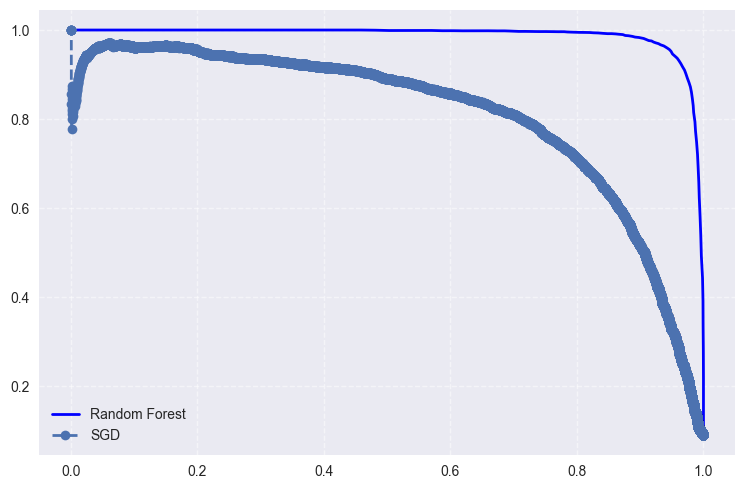

In [86]:
plt.style.use('seaborn-v0_8')
plt.plot(recall_forest, precision_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recall, precisions, "--", linewidth=2, label="SGD",marker="o")
plt.grid(linestyle='--', alpha=0.5, zorder=0)
plt.legend()
plt.show()

In [87]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [88]:
plt.style.use('fivethirtyeight')

In [89]:
y_train_pred_forest = y_proba_fortes[:,1] >= 0.5
f1_score(y_train_5, y_train_pred_forest)

0.9274509803921569

In [90]:
roc_auc_score(y_train_5, y_score_forest)

np.float64(0.9983436731328145)

In [91]:
from sklearn.svm import SVC
from sklearnex import patch_sklearn
svm_clf = SVC(random_state=42)

svm_clf.fit(X_train[:2000], y_train[:2000])

SVC(random_state=42)

In [92]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [100]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [102]:
class_id = some_digit_scores.argmax()
class_id

np.int64(5)

In [103]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [106]:
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [109]:
ovr_clf.predict([some_digit])



array(['5'], dtype='<U1')

In [108]:
len(ovr_clf.estimators_)

10

In [111]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train[:2000], y_train[:2000])


SGDClassifier(random_state=42)

In [112]:
sgd_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [114]:
sgd_clf.decision_function([some_digit]).round()

array([[-1704540., -1683382., -2594123.,  -145668., -3270741.,    -4884.,
        -3420127., -1846510., -1328858., -2043246.]])

In [115]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, n_jobs=-1, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))

In [118]:
cross_val_score(sgd_clf,X_train_scaled, y_train,cv=3, scoring="accuracy", n_jobs=-1)

array([0.8983, 0.891 , 0.9018])

In [119]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3, n_jobs=-1)

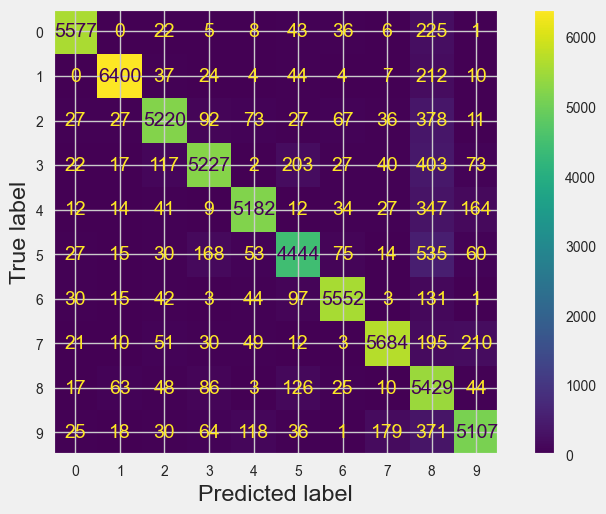

In [122]:
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred)
plt.show()

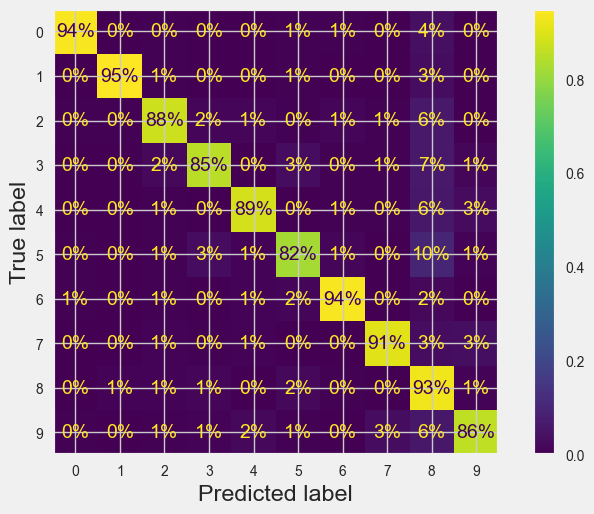

In [125]:
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred, normalize="true", values_format=".0%")

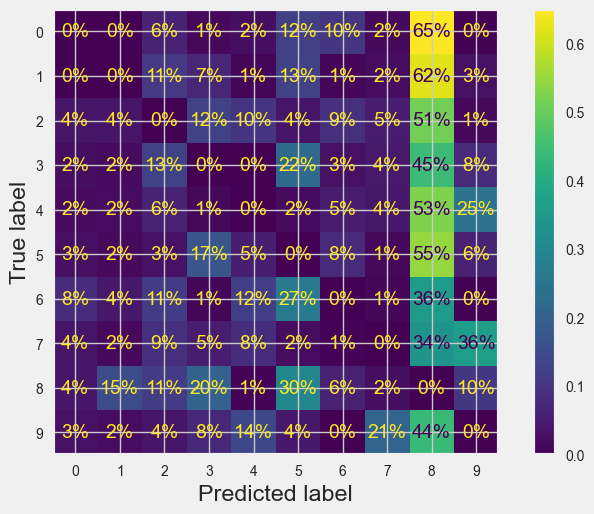

In [126]:
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred, sample_weight=sample_weight,
                                         normalize="true", values_format=".0%")

In [134]:
cl_a, cl_b = "3", "5"
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

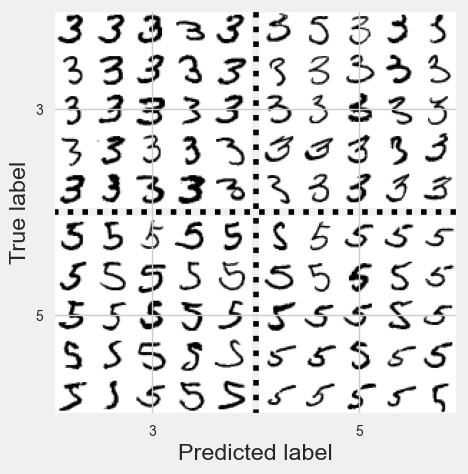

In [136]:
size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")

plt.show()

In [142]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= "7")
y_train_odd = (y_train.astype("int8")% 2 ==1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [143]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier()

In [144]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [145]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train,
                                      y_multilabel, cv=3, n_jobs=-1)

In [146]:
f1_score(y_multilabel, y_train_knn_pred, average="macro")


0.9764102655606048

In [147]:
from sklearn.multioutput import ClassifierChain

chain_clf =ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])


ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [148]:
chain_clf.predict([some_digit])

array([[0., 1.]])

In [154]:
np.random.seed(42)
noise = np.random.randint(0,100, (len(X_train),784))
X_train_mod = X_train + noise

noise = np.random.randint(0,100, (len(x_test),784))
X_test_mod = x_test + noise
y_train_mod = X_train
y_test_mod = x_test

In [155]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)


KNeighborsClassifier()

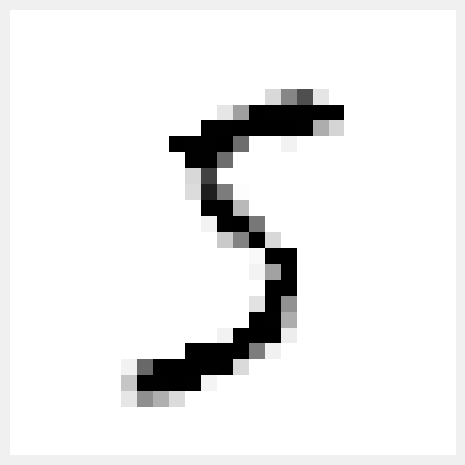

In [157]:
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
plt.show()